In [1]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib qt
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

In [2]:
mpl.backends

<module 'matplotlib.backends' from '/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/matplotlib/backends/__init__.py'>

In [3]:
!ls

0221428AP.dcm  DisplayDicom.ipynb


In [4]:
import os
import glob
import typing
def get_file_list(path: str, wild: str = None) -> list:
    ret_list = []
    if not path.endswith('/'):
        path = path + '/'
    
    if wild:
        for filename in glob.glob(path + wild):
            ret_list.append(filename)
    else:
        for filename in os.listdir(path):
            ret_list.append(filename)
    
    return ret_list

In [30]:
import matplotlib.pyplot as plt
import pydicom
import random

random.seed(11)
image_dir = '/slurm_storage/mbopf/data/PedTB/renamed'
full_list = get_file_list(image_dir, "*[AP|PA]*.dcm")
random.shuffle(full_list)
batch_size = 8
batch_num = 1
print(full_list[:8])

['/slurm_storage/mbopf/data/PedTB/renamed/120228-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/N0378612-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/N0379848-PA.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/0221116-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/N0379560-PA.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/0845264-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/0844472-LAT.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/045356-LAT.dcm']


2 8 16
/slurm_storage/mbopf/data/PedTB/renamed/N0378528-AP.dcm
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.528.1.1001.100.4.4641.2213.795751423.20190726012004359
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.528.1.1001.2.20060808.1
(0002, 0013) Implementation Version Name         SH: 'GEHC_DCM06_1'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'SINGLE PLANE']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.528.1.1001.100.4.4641.2213.795751423.20190726012004359

/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '10.0.1.70.046592'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


AttributeError: Unable to convert the pixel data as the following required elements are missing from the dataset: PixelRepresentation

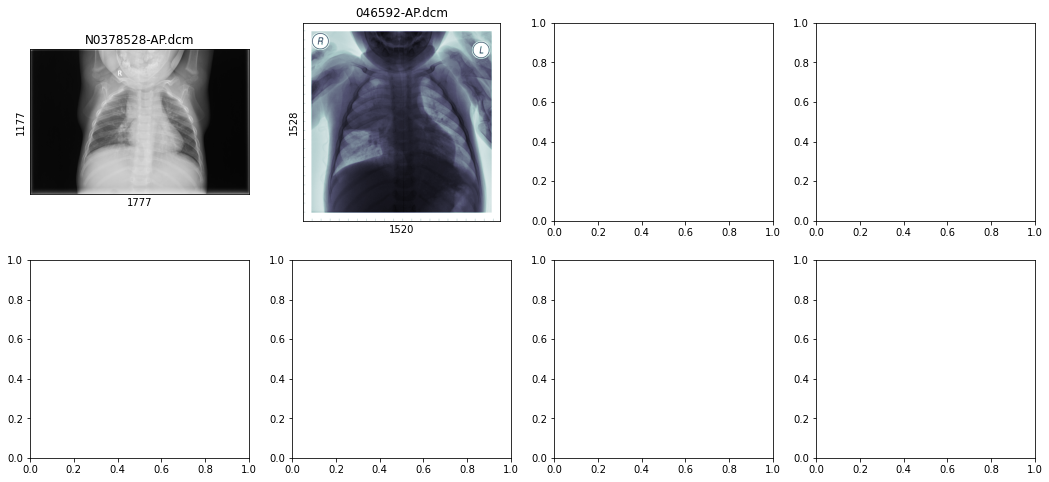

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18,8))
start = batch_size * (batch_num - 1)
end = batch_size * batch_num
print(batch_num, start, end)
for ax, file in zip(axs.ravel(), full_list[start:end]):
    print(file)
    basename = os.path.basename(file)
    dicom_ds = pydicom.read_file(file, force=True)
    print(dicom_ds)
    pixel_array = dicom_ds.pixel_array
    ishape = pixel_array.shape
    #print(ishape[0])
    ax.set_title(basename)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_xlabel(ishape[1])
    ax.set_ylabel(ishape[0])
    ax.imshow(pixel_array, cmap=plt.cm.bone) 
    
plt.show()
batch_num += 1
